In [1]:
##########################################################################
# Created on Sat Otc 30 23:57:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 5.3.4.arch module

In [4]:
# Install arch
#import sys
#!conda install --yes --prefix {sys.prefix} -c bashtage arch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python

  added / updated specs:
    - arch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arch-4.15                  |   py36h14c3975_0         1.0 MB  bashtage
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    cython-0.29.24             |   py36h295c915_0         1.9 MB
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  arch               bashtage/linux-64::arch-4.15-py36h14c3975_0
  cython             pkgs/main/l

In [5]:
import arch
arch.__version__

'4.15'

In [2]:
from arch import arch_model
import pandas as pd

index=pd.read_excel('SME_GEM daily(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
MS_Index=index.iloc[:,0]
MS_Index.index=pd.DatetimeIndex(MS_Index.index)

In [15]:
model_arch=arch_model(y=MS_Index,mean='Constant',lags=0,vol='ARCH',p=1,o=0,q=0,dist='normal',rescale=False) #ARCH(1) Model
result_arch=model_arch.fit()
result_arch.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 647041297.2817391
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1505.4108090590653
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1969.4567003310995
Iteration:      4,   Func. Count:     28,   Neg. LLF: -1971.8906942873537
Iteration:      5,   Func. Count:     33,   Neg. LLF: -1968.5358491851744
Iteration:      6,   Func. Count:     38,   Neg. LLF: -1972.006114946738
Iteration:      7,   Func. Count:     42,   Neg. LLF: -1972.006115642415
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1972.006115642415
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              SME Index   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:                1972.01
Distribution:                  Normal   AIC:                          -3938.01
Method:            Maximum Likelihood   BIC:                          -3924.23
                                        No. Observations:                  730
Date:                Sun, Oct 31 2021   Df Residuals:                      727
Time:                        05:33:00   Df Model:                            3
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.2541e-04  5.883e-04      0.723      0.470 [-7.276e-04,1.578e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.4618e-04  2.206e-05     11.160  6.423e-29 [2.029e-04,2.894e-04]
alpha[1]       0.0741  7.645e-02      0.970      0.332  [-7.572e-02,  0.224]
============================================================================

Covariance estimator: robust
"""

In [7]:
model_garch=arch_model(y=MS_Index,mean='Constant',lags=0,vol='GARCH',p=1,o=0,q=1,dist='normal',rescale=False) #GARCH(1,1) Model
result_garch=model_garch.fit()
result_garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1497467135.4740648
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1990.370627235538
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1990.3706266907175
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              SME Index   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                1990.37
Distribution:                  Normal   AIC:                          -3972.74
Method:            Maximum Likelihood   BIC:                          -3954.37
                                        No. Observations:                  730
Date:                Sun, Oct 31 2021   Df Residuals:                      726
Time:                        05:25:35   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.1791e-04  5.440e-04      1.320      0.187 [-3.484e-04,1.784e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.6545e-05  1.408e-06     18.857  2.577e-79 [2.379e-05,2.930e-05]
alpha[1]       0.1000  3.471e-02      2.881  3.967e-03   [3.196e-02,  0.168]
beta[1]        0.8000  2.499e-02     32.009 8.141e-225     [  0.751,  0.849]
============================================================================

Covariance estimator: robust
"""

In [9]:
result_garch.params

mu          0.000718
omega       0.000027
alpha[1]    0.100000
beta[1]     0.800000
Name: params, dtype: float64

In [11]:
import numpy as np
vol=np.sqrt(result_garch.params[1]/(1-result_garch.params[2]-result_garch.params[3]))
print('Long run volatility(daily) used GARCH(1,1) is',round(vol,4))

Long run volatility(daily) used GARCH(1,1) is 0.0163


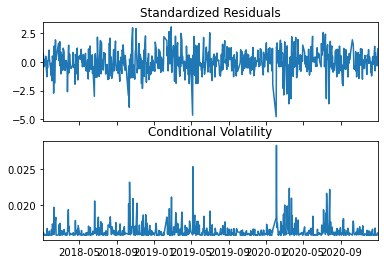

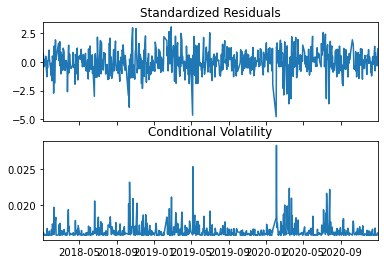

In [16]:
result_arch.plot()

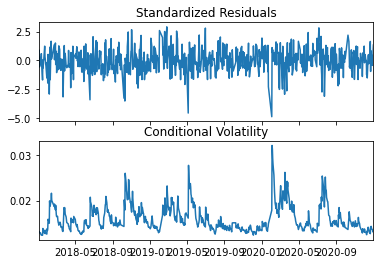

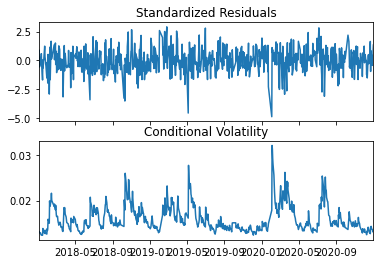

In [13]:
result_garch.plot()